# Multilinear Regression 

## The multilinear regression model is used to estimate the house price in the boston based n the given features

    
Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1)    

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
        
        
### The dependent variable (target/output) for the model is median value (MEDV) and all the remaning are features 

### Assumption of linear regression:

    Linearity: The relationship between dependendent and independent variable must be linear

    Homoscedasticity: The variance of residual is the same for any value of independent variable

    Normality: Residual is normally distributed

    No multicolinearity in the independent variables

In [18]:
# Import all the required model

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle as pk#Save the model in HDD
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

## Load the dataset

In [29]:
'''
from sklearn import datasets boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target'''

'''
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
'''


boston_df = pd.read_csv("Boston.csv",sep=',')
boston_df.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Check the data information like column name, datatypes total entries in the dataset and data cleaning

In [30]:
boston_df.info() # Dataset before data cleaning


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [31]:
boston_df.isnull().sum()  # no null values are in dataset

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [47]:
boston_df.duplicated().sum() # no duplicate entries in the dataset

0

### Dataset contains no null values in the columns, so no need for any data imputation required

### Unnamed: 0 column is not required for the analysis so the column is drop from the dataset 



In [32]:
del boston_df["Unnamed: 0"]

In [33]:
boston_df.head() # Dataset after data cleaning

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [34]:
boston_df.info() # Dataset after data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Overall dataset description 

In [65]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Check the linearity & correlation between dependent and independent variables

   1. The linear regression model is used only when there is linear replationship between dependent and independent           variables
   2. The linear regression model is sensetive to the outliers and the data units
   

### Data distribution for every columns

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

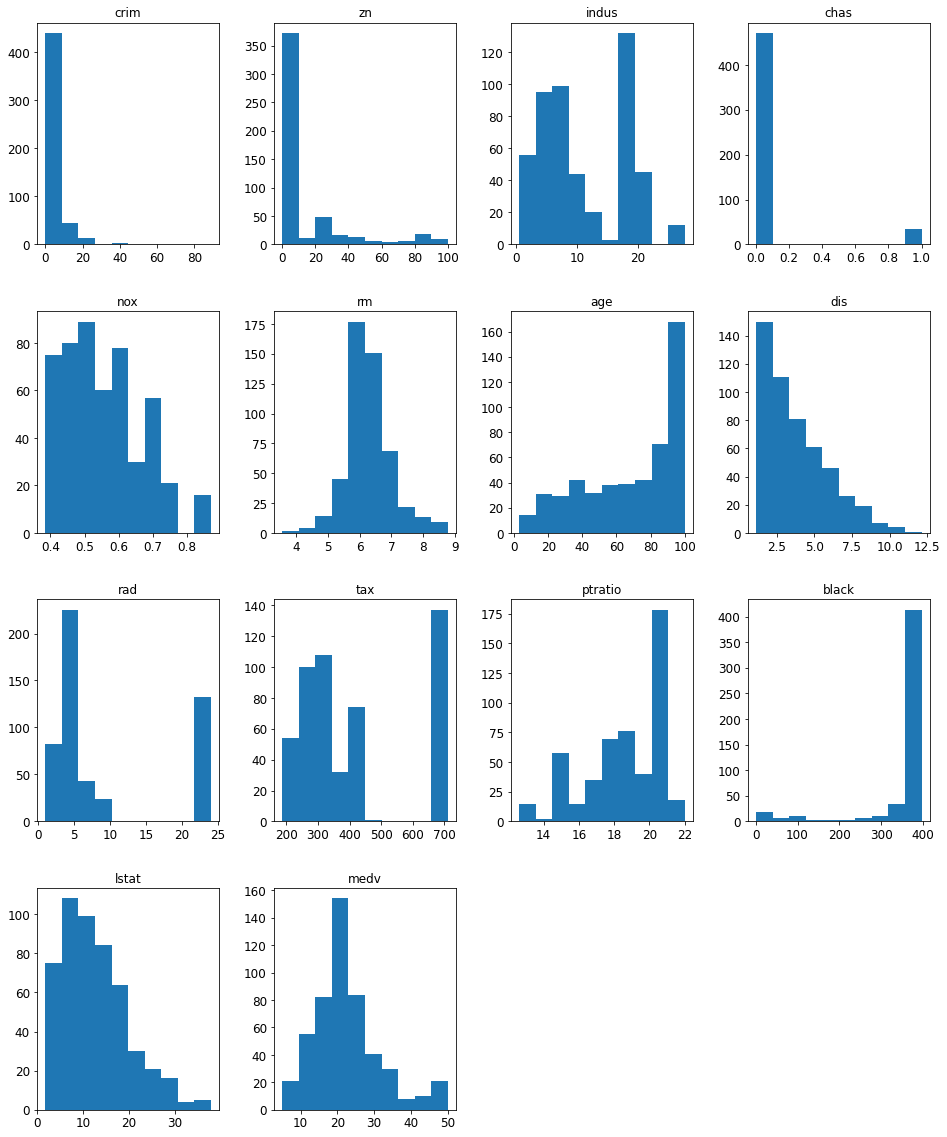

In [48]:
# let's see how data is distributed for every column
boston_df.hist(figsize=(16, 20),xlabelsize=12, ylabelsize=12,grid=False)

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medv', ylabel='Density'>

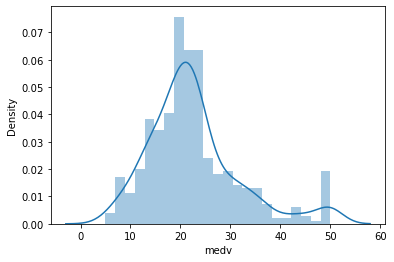

In [58]:
sns.distplot(boston_df["medv"])  # target\independent variable distribution 

### Data correlation for every columns

<AxesSubplot:>

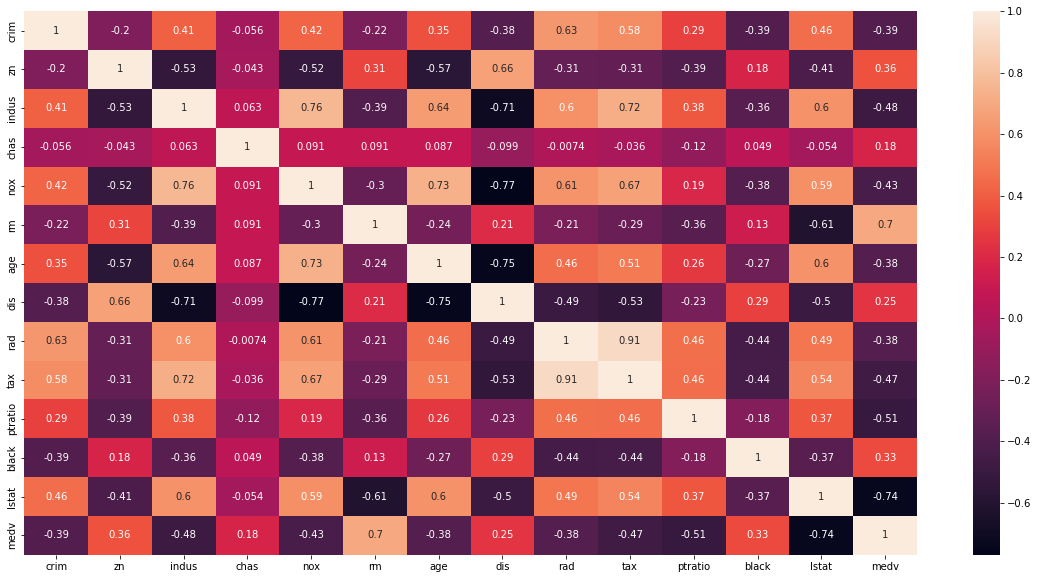

In [63]:
cor=boston_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

In [67]:
boston_df.corr()['medv'][:-1] # correlation with the dependent variable

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
black      0.333461
lstat     -0.737663
Name: medv, dtype: float64

## Divide the data into dependent and independent variables

In [72]:
y = boston_df['medv'] # Dependent variable-- medv
x =boston_df.drop(columns =['medv']) # Independent variable-- all columns except medv

In [73]:
x.shape # check the size of Independent variable

(506, 13)

In [74]:
y.shape # check the size of dependent variable

(506,)

### Check the relationship between dependent and independent variables

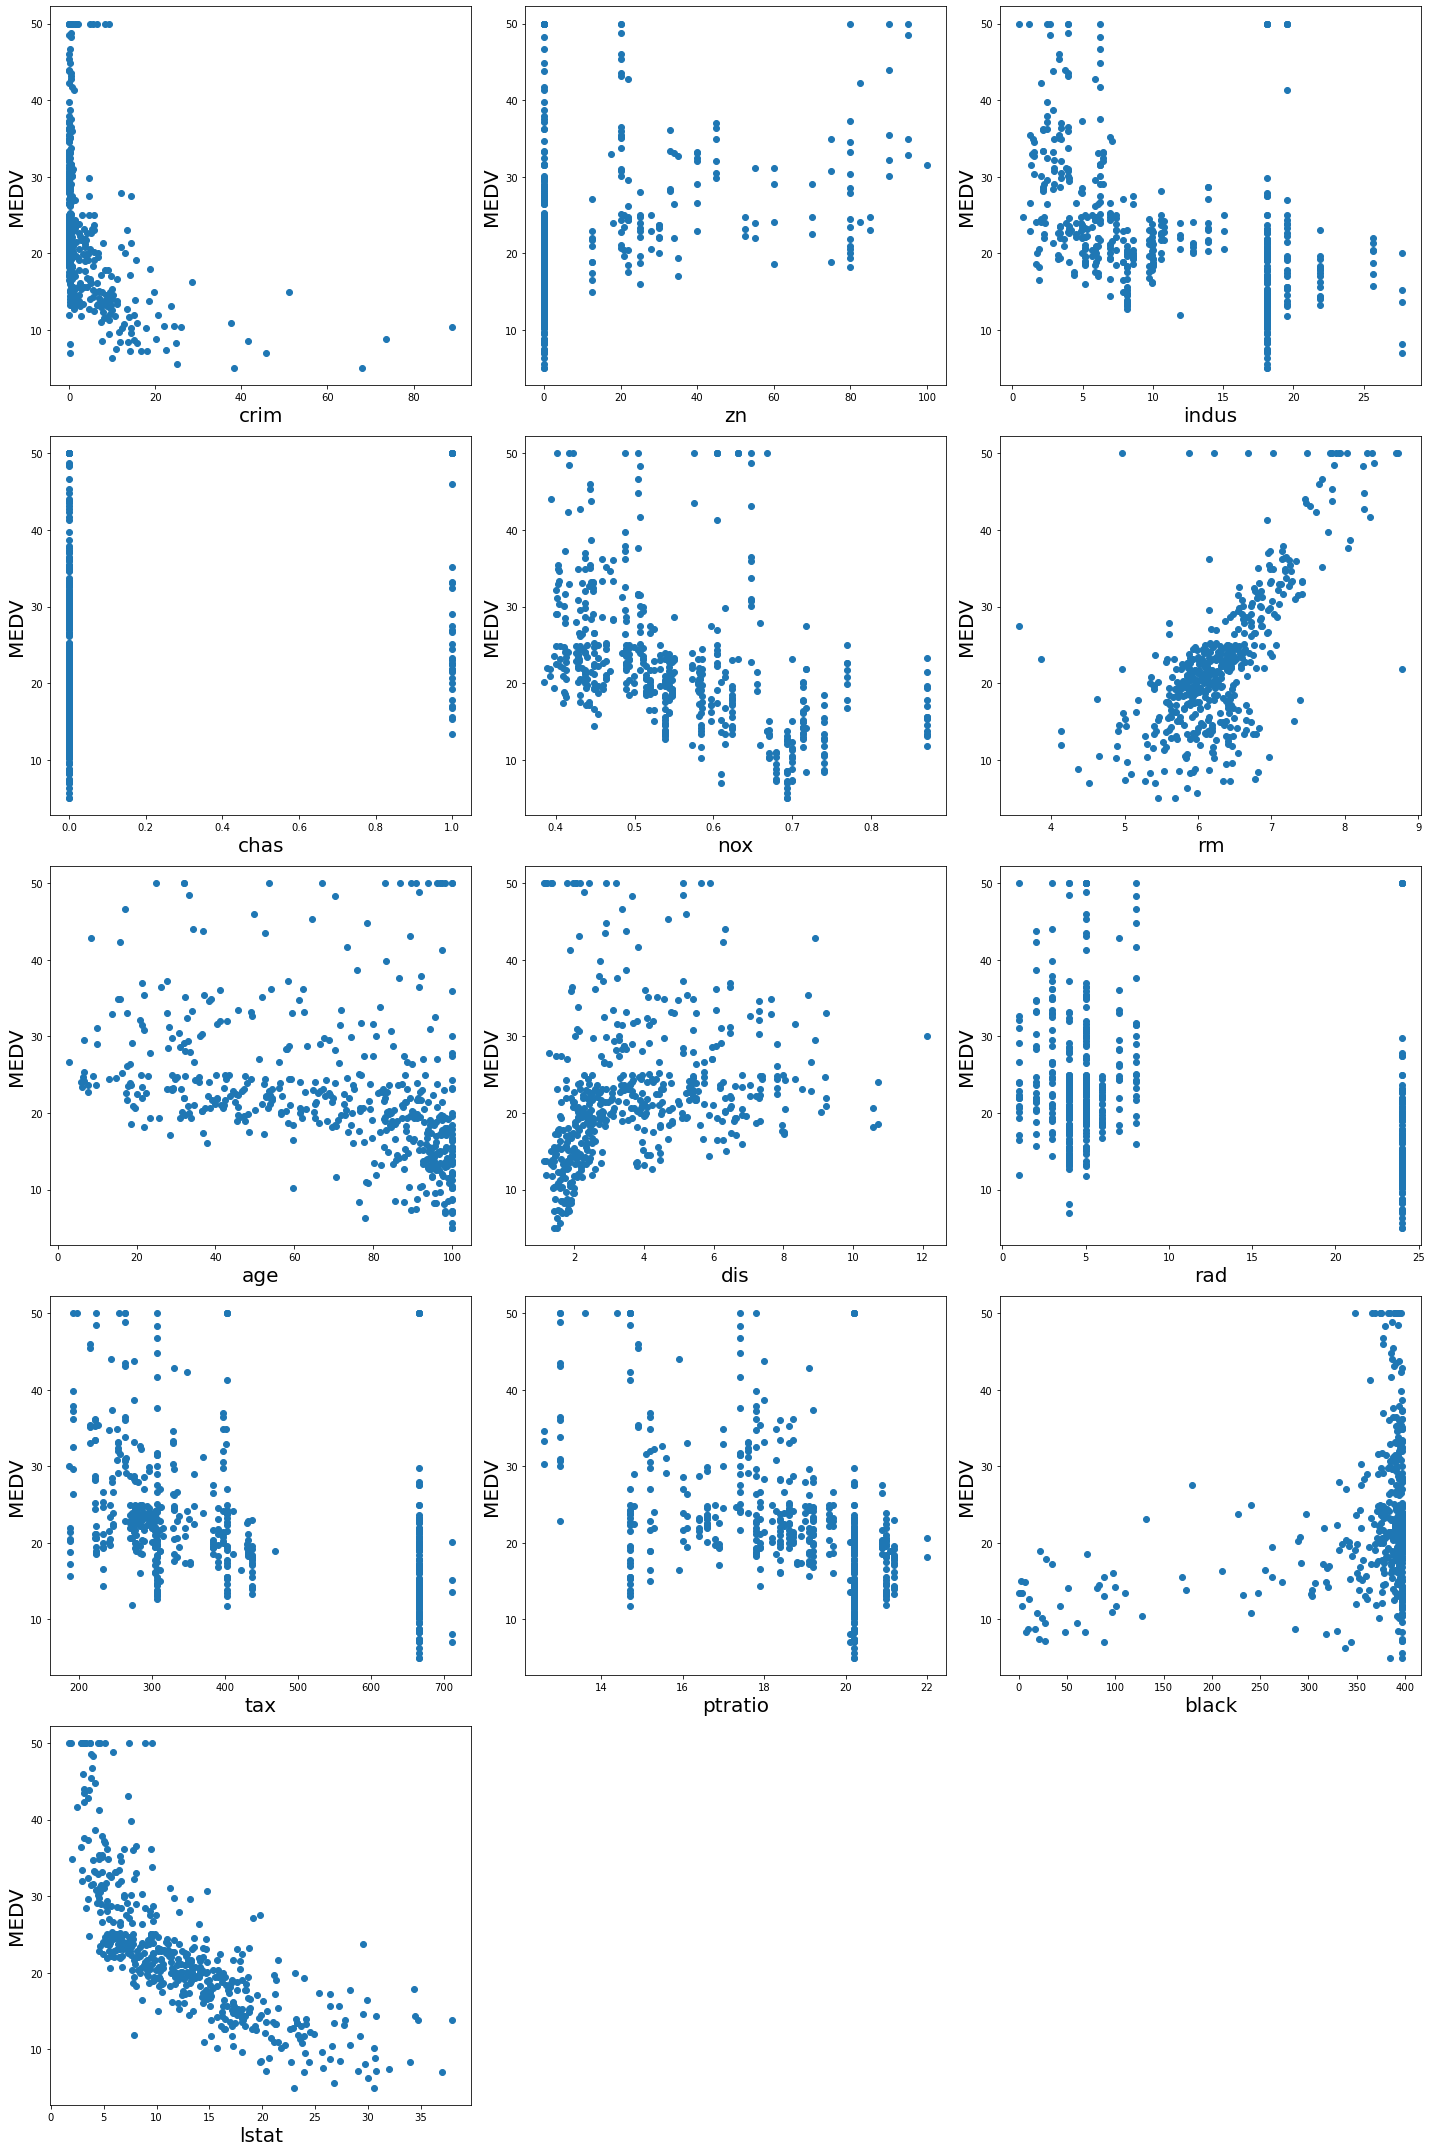

In [76]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=13:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('MEDV',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [79]:
#fig, ax = plt.subplots(round(len(boston_df.columns) / 3), 3, figsize = (18, 12))
#for i, ax in enumerate(fig.axes):
#    if i < len(boston_df.columns) - 1:
#        sns.regplot(x=boston_df.columns[i],y='medv',data=boston_df[boston_df.columns], ax=ax)

### Due to multivariate independent variable, reshaping is not required in case of multilinear regression 
### lstat- shows negative relationship and rm- shows positive relationship with the medv
### Most of the features/independent variables shows negative correlation with the target/dependent variable

## Data Standardization 

    1. The dataset contains different columns with different data units
    2. In multilinear regression analysis, we required all the feature data in the same unit, so we are going to apply         
       standardization technique to the dataset i.e. for all the independent variables 

In [82]:
scaler =StandardScaler() # Standardization library-- uses standard distribution-- mean=0; std=1
x_scaled = scaler.fit_transform(x) # transform all the feature value  
x_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

## Divide the dataset into training and testing dataset 

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=355)

In [91]:
#x_train

In [90]:
#x_test

In [89]:
#y_test

In [88]:
#y_train

## Build a linear regression model

In [94]:
M_reg_model = LinearRegression()

M_reg_model.fit(x_train,y_train) # Model learning phase using training dataset

LinearRegression()

## Model coefficient (slop/m) and y-intercept (c) 

In [95]:
M_reg_model.coef_  # slop (m)

array([-0.88712272,  1.175452  , -0.11610477,  0.9549459 , -1.98781429,
        3.1067488 , -0.39245347, -3.18778152,  2.28873011, -1.82529057,
       -1.84545771,  0.82059585, -2.89878976])

In [96]:
M_reg_model.intercept_ # y-intercept (c)

22.50722857528611

# Prediction of dependent variable (y) 

## For training dataset

In [98]:
predy_train=M_reg_model.predict(x_train)

In [102]:
#predy_train # prediction of 22 entries of training dataset

## For testing dataset

In [103]:
predy_test=M_reg_model.predict(x_test)

In [107]:
#predy_test # prediction of 8 entries of testing dataset

## For all dataset

In [117]:
predy=M_reg_model.predict(x_scaled)   # use the standardize feature value

In [116]:
#predy # prediction of all 30 entries

### 10 entries of actual (test value) and predicted (test value)  values of model 

In [130]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':predy_test})
df2 = df1.head(10)
df2

,Actual,Predicted
488,15.2,11.798864
128,18.0,19.007242
191,30.5,30.155699
53,23.4,23.816257
388,10.2,7.005349
242,22.2,24.012905
29,21.0,21.021584
486,19.1,19.218417
257,50.0,43.382949
476,16.7,20.624139


### 10 entries of actual (train value) and predicted (train value)  values of model 

In [133]:
df1 = pd.DataFrame({'Actual': y_train, 'Predicted':predy_train})
df2 = df1.head(10)
df2

,Actual,Predicted
227,31.6,31.851987
382,11.3,13.522184
23,14.5,14.171578
348,24.5,27.678742
157,41.3,31.732625
413,16.3,11.338395
415,7.2,11.013084
204,50.0,43.627903
116,21.2,23.208977
83,22.9,24.821987


Loss/cost function calculation

In [118]:
loss_fun_reg=sum((predy-y)**2)/2*len(y)
loss_fun_reg

2849178.0038401573

# Model Accuracy

## Model training accuracy using .score method

In [119]:
train_acc=M_reg_model.score(x_train,y_train)
train_acc

0.730647531347494

## Model testing accuracy using .score method

In [120]:
test_acc=M_reg_model.score(x_test,y_test)
test_acc

0.7519030329262334

## Model training accuracy using R square method

In [121]:
r_squared_train=r2_score(y_train, predy_train)
r_squared_train

0.730647531347494

## Model testing accuracy using R square method

In [122]:
r_squared_test=r2_score(y_test, predy_test)
r_squared_test

0.7519030329262334

## Model training accuracy using Adjusted R square method

In [124]:
adjusted_r_squared_train= 1 - (1-r_squared_train)*(len(y)-1)/(len(y)-x.shape[1]-1)
adjusted_r_squared_train

0.7235304945741555

## Model testing accuracy using Adjusted R square method

In [125]:
adjusted_r_squared_test= 1 - (1-r_squared_test)*(len(y)-1)/(len(y)-x.shape[1]-1)
adjusted_r_squared_test

0.74534762525965

## MSE & RMSE values for training dataset

In [126]:
mse_train=mean_squared_error(y_train,predy_train)
mse_train

22.282092126271717

In [127]:
rmse_train=sqrt(mse_train)
rmse_train

4.720391098867944

## MSE & RMSE values for testing dataset

In [128]:
mse_test=mean_squared_error(y_test,predy_test)
mse_test

22.17842694370991

In [129]:
rmse_test=sqrt(mse_test)
rmse_test

4.70939772621828

## Evaluation

### Training Accuracy
     1. Using .score methode: 73%
     2. Using R square methode: 73%
     3. Using Adjusted R square methode: 72%
     
### Testing Accuracy
     1. Using .score methode: 75%
     2. Using R square methode: 75% 
     3. Using Adjusted R square methode: 74%

### Training MSE & RMSE
     1. MSE:  22.28
     2. RMSE: 4.72
    
### Testing MSE & RMSE
     1. MSE:  22.17
     2. RMSE: 4.71


    1. R squared and Adjusted R squared are more or like same, i.e. all the considered features used for the prediction are relevant 
    2. Adjusted R squared can be used for relevent feature selection

## Saving the linear regression model in local drive

In [170]:
filename="mlr_boston.pk"
pk.dump(M_reg_model,open(filename,"wb"))

# Regularization

    Regularization is used to reduce the overfitting (effect of overfitting) using hyperparameter tunning method

## Lasso (L1) Regression


    Uses existing loss function + alpha * (m) for reducing the overfitting  

In [142]:
# Import libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Use l1 regression for model
lasso=Lasso()

# hyperparameter values (lambda or alpha)
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200,300,1.1,0.9,0.8,0.7,0.5,0.4,0.3,0.2,0.33]}

# Cross validation using hyperparameter with k=5 
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

# fit the model using lasso regression for best lambda calculation 
lasso_regressor.fit(x,y)


print(f'Best value of hyperparameter (alpha/lambda) is: {lasso_regressor.best_params_}')
print(f'MSE value for best hyperparameter is: {lasso_regressor.best_score_}')

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Best value of hyperparameter (alpha/lambda) is: {'alpha': 0.33}
MSE value for best hyperparameter is: -34.44114847278197


## Train the model using best alpha value 

In [149]:
lasso_alpha=lasso_regressor.best_params_['alpha']
lasso_reg = Lasso(lasso_alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.33)

# Prediction of dependent variable (y) using Lasso regression

### For training dataset

In [159]:
predy_train_lasso=lasso_reg.predict(x_train)
#predy_train_lasso

### For testing dataset

In [164]:
predy_test_lasso=lasso_reg.predict(x_test)
#predy_test_lasso

### For entire dataset

In [169]:
predy_lasso=lasso_reg.predict(x_scaled)  
#predy_lasso

# Model Accuracy using Lasso Regression

## Training accuracy using .score

In [171]:
lasso_r_sq_train=lasso_reg.score(x_train,y_train)
lasso_r_sq_train

0.6992415211153435

## Testing accuracy using .score

In [172]:
lasso_r_sq_test=lasso_reg.score(x_test,y_test)
lasso_r_sq_test

0.713231276718937

## Training accuracy using Adjusted R squared

In [173]:
lasso_adjusted_r_squared_train= 1 - (1-lasso_r_sq_train)*(len(y)-1)/(len(y)-x.shape[1]-1)
lasso_adjusted_r_squared_train

0.69129465073831

## Testing accuracy using Adjusted R squared

In [174]:
lasso_adjusted_r_squared_test= 1 - (1-lasso_r_sq_test)*(len(y)-1)/(len(y)-x.shape[1]-1)
lasso_adjusted_r_squared_test

0.7056540543558196

## MSE & RMSE values for training dataset using Lasso regression

In [175]:
mse_train_lasso=mean_squared_error(y_train,predy_train_lasso)
mse_train_lasso

24.880143730596235

In [177]:
rmse_train_lasso=sqrt(mse_train_lasso)
rmse_train_lasso

4.987999972994811

## MSE & RMSE values for testing dataset using Lasso regression

In [176]:
mse_test_lasso=mean_squared_error(y_test,predy_test_lasso)
mse_test_lasso

25.63545719258623

In [178]:
rmse_test_lasso=sqrt(mse_test_lasso)
rmse_test_lasso

5.063146965335514

## Evaluation of Lasso Regression

### Training Accuracy
     1. Using .score methode: 69.92%
     2. Using Adjusted R square methode: 69.12%
     
### Testing Accuracy
     1. Using .score methode: 71.32%
     2. Using Adjusted R square methode: 70.56%

### Training MSE & RMSE
     1. MSE:  24.88
     2. RMSE: 4.98
    
### Testing MSE & RMSE
     1. MSE:  25.63
     2. RMSE: 5.06

## Saving the lasso linear regression model in local drive

In [194]:
filename="mlr_boston_lasso.pk"
pk.dump(lasso_reg,open(filename,"wb"))

# Ridge(L2) Regression

     Uses existing loss function + alpha * (m^2) for reducing the overfitting 

In [180]:
# Import libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Use l2 regression for model
ridge=Ridge()

# hyperparameter values (lambda or alpha)
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,101,220,219,215,210,207,208,206,205]}

# Cross validation using hyperparameter with k=5 
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

# fit the model using lasso regression for best lambda calculation 
ridge_regressor.fit(x,y)


print(f'Best value of hyperparameter (alpha/lambda) is: {ridge_regressor.best_params_}')
print(f'MSE value for best hyperparameter is: {ridge_regressor.best_score_}')


Best value of hyperparameter (alpha/lambda) is: {'alpha': 205}
MSE value for best hyperparameter is: -29.842633670826796


# Train model using best alpha value

In [187]:
Ridge_alpha=ridge_regressor.best_params_['alpha']
ridge_reg = Ridge(Ridge_alpha)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=205)

# Model Accuracy using Ridge Regression

In [193]:
# User defined function for adjusted r squared

def adj_r2(x,y,model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

## .score and adjusted R squared for training dataset

In [189]:
ridge_r_sq_train=ridge_reg.score(x_train,y_train)
ridge_r_sq_train

0.676831894736837

In [190]:
adj_r2(x_train,y_train,ridge_reg)

0.6653217978370531

## .score and adjusted R squared for testing dataset

In [191]:
ridge_r_sq_test=ridge_reg.score(x_test,y_test)
ridge_r_sq_test

0.6687725200628489

In [192]:
adj_r2(x_test,y_test,ridge_reg)

0.6306667037868935

## Evaluation of Ridge Regression

### Training Accuracy
     1. Using .score methode: 67.68%
     2. Using Adjusted R square methode: 66.53%
     
### Testing Accuracy
     1. Using .score methode: 66.87%
     2. Using Adjusted R square methode: 63.06%

## Saving the ridge linear regression model in local drive

In [196]:
filename="mlr_boston_ridge.pk"
pk.dump(ridge_reg,open(filename,"wb"))

# Elastic Net (L3)

     Uses both L1 and L2 regression method i.e.
     existing loss function + alpha * (m) + alpha * (m^2) for reducing the overfitting 

In [197]:
# Import library
from sklearn.linear_model  import  ElasticNetCV

# Select cross validation and alpha automatically
elasticCV = ElasticNetCV(alphas = None, cv =5)

# fit the model
elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=5)

In [199]:
# Best value of alpha
elastic_alpha=elasticCV.alpha_
elastic_alpha

0.024805870965008987

# Train the model using elastic net

In [200]:
from sklearn.linear_model  import  ElasticNet
elasticnet_reg = ElasticNet(alpha = elastic_alpha)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.024805870965008987)

# Model Accuracy using Elastic Net

In [201]:
# User defined function for adjusted r squared

def adj_r2(x,y,model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

## .score and adjusted R squared for training dataset

In [202]:
elastic_r_sq_train=elasticnet_reg.score(x_train,y_train)
elastic_r_sq_train

0.7299710330907252

In [203]:
adj_r2(x_train,y_train,elasticnet_reg)

0.7203535630364223

## .score and adjusted R squared for testing dataset

In [204]:
elastic_r_sq_test=elasticnet_reg.score(x_test,y_test)
elastic_r_sq_test

0.7487551475558303

In [205]:
adj_r2(x_test,y_test,elasticnet_reg)

0.7198508724958815

## Evaluation of Ridge Regression

### Training Accuracy
     1. Using .score methode: 72.99%
     2. Using Adjusted R square methode: 72.035%
     
### Testing Accuracy
     1. Using .score methode: 74.87%
     2. Using Adjusted R square methode: 71.98%

## Saving the elastic net regression model in local drive

In [206]:
filename="mlr_boston_elastic.pk"
pk.dump(elasticnet_reg,open(filename,"wb"))

# Observations

    1. As we compare accuracy of multiple linear regression model with regularization i.e. Lasso, Ridge and Elatic net, later will be used to reduce the effect of overfitting
    2. Following is the comparision;
    
       Model	                 Training Accuracy (%)	              Testing Accuracy (%)
       
	                         .score method	Adjusted R square	.score method	Adjusted R square
    Linear Reg.	                   73.06	   72.35	              75.19	          74.53
    Lasso	                         69.92	   69.12	              71.32	          70.56
    Ridge 	                        67.68	   66.53	              66.87	          63.06
    Elastic Net	                   72.99	   72.04	              74.87	          71.98

      3. As per the requirements, we can select the model with regularization.   
      
      
      
we can see by using different type of regularization, we are getting the somewhat different accuracy. That means our model has been overfit using the training data.